'''
    In this code we will try to visualize data present in data.gov.in corresponding to air pollution in Delhi
    from year 1987 to 2015.
    3 types of plots will be shown : Line Plot, Scatter Plot and Box Plot
'''


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime, date

In [13]:
'''
    This function will create a line plot between xdata and ydata.
    xdata : X coordinates of data points
    ydata : Y corrdinates of data points
    opts : Specifies list of possible options
        - title : Specify title of the plot
        - xlabel : Specify label of X axis of the plot
        - ylabel : Specify label of Y axis of the plot
        - plot_label : Specify the legend label of the plot
        - show_fig : If this is False figure will not been shown (True by defualt)
        - save_fig : None/<Path/NameWithExtension>
        - reuse_last_fig : plot new data on existing axes given by (fig,ax) as value , None by default
'''
def create_line_plot(xdata,ydata,opts):
    
    title = opts.get('title',"")
    xlabel = opts.get('xlabel',"")
    ylabel = opts.get('ylabel',"")
    plot_label = opts.get('plot_label',None)
    show_fig = opts.get('show_fig',True)
    save_fig = opts.get('save_fig',None)
    reuse_last_fig = opts.get('reuse_last_fig',None)
    
    if reuse_last_fig == None:
        fig,ax = plt.subplots()
    else:
        fig,ax = reuse_last_fig
        
    # Setting x and y axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Plotting Data  
    ax.plot(xdata,ydata,label=plot_label)
    
    # Setting Legend
    if plot_label is not None:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels)
    
    # Setting Title
    ax.set_title(title)
    
    # Save figure according to options
    if save_fig is not None:
        fig.savefig(save_fig,bbox_inches='tight')
    
    # Show figure according to options
    if show_fig == True:
        plt.show()
        
    
    

In [15]:
'''
    This function will create a scatter plot between xdata and ydata.
    xdata : X coordinates of data points
    ydata : Y corrdinates of data points
    opts : Specifies list of possible options
        - title : Specify title of the plot
        - xlabel : Specify label of X axis of the plot
        - ylabel : Specify label of Y axis of the plot
        - plot_label : Specify the legend label of the plot
        - show_fig : If this is False figure will not been shown (True by defualt)
        - save_fig : None/<Path/NameWithExtension>
        - reuse_last_fig : plot new data on existing axes given by (fig,ax) as value , None by default
        - xtick_rotation : Rotation of labels of x axis in case they don't fit, By Default 0
'''
def create_scatter_plot(xdata,ydata,opts):
    
    title = opts.get('title',"")
    xlabel = opts.get('xlabel',"")
    ylabel = opts.get('ylabel',"")
    plot_label = opts.get('plot_label',None)
    show_fig = opts.get('show_fig',True)
    save_fig = opts.get('save_fig',None)
    reuse_last_fig = opts.get('reuse_last_fig',None)
    xtick_rotation = opts.get('xtick_rotation',0)
    
    
    if reuse_last_fig == None:
        fig,ax = plt.subplots()
    else:
        fig,ax = reuse_last_fig
        
    # Setting x and y axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Plotting Data  
    ax.scatter(xdata,ydata,label=plot_label)
    
    # Setting Legend
    if plot_label is not None:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels)
    
    # Setting Title
    ax.set_title(title)
    
    # Rotating X Axis ticks
    plt.xticks(rotation=xtick_rotation)
    
    # Save figure according to options
    if save_fig is not None:
        fig.savefig(save_fig,bbox_inches='tight')
    
    # Show figure according to options
    if show_fig == True:
        plt.show()
        
    
    

In [17]:
'''
    This function will create a box plot between xdata and ydata.
    
    ydata : Collection(s) of data points
    opts : Specifies list of possible options
        - title : Specify title of the plot
        - xlabel : Specify label of X axis of the plot
        - ylabel : Specify label of Y axis of the plot
        - show_fig : If this is False figure will not been shown (True by defualt)
        - save_fig : None/<Path/NameWithExtension>
        - reuse_last_fig : plot new data on existing axes given by (fig,ax) as value , None by default
        - xtick_rotation : Rotation of labels of x axis in case they don't fit, By Default 0
        - showfliers : Show outliers, By Default True
        - xtick_labels : List of names of categories, By Default range(len(ydata))
'''
def create_box_plot(ydata,opts):
    
    title = opts.get('title',"")
    xlabel = opts.get('xlabel',"")
    ylabel = opts.get('ylabel',"")
    show_fig = opts.get('show_fig',True)
    save_fig = opts.get('save_fig',None)
    reuse_last_fig = opts.get('reuse_last_fig',None)
    xtick_rotation = opts.get('xtick_rotation',0)
    showfliers = opts.get('showfliers',True)
    xtick_labels = opts.get('xtick_labels',range(len(ydata)))
    
    if reuse_last_fig == None:
        fig,ax = plt.subplots()
    else:
        fig,ax = reuse_last_fig
        
    # Setting x and y axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Plotting Data  
    ax.boxplot(ydata,showfliers=showfliers)
    
    
    
    # Setting Title
    ax.set_title(title)
    
    # Rotating X Axis ticks and Setting its labels
    ax.set_xticks(range(1,len(ydata)+1))
    ax.set_xticklabels(xtick_labels, rotation=xtick_rotation)
    
    # Save figure according to options
    if save_fig is not None:
        fig.savefig(save_fig,bbox_inches='tight')
    
    # Show figure according to options
    if show_fig == True:
        plt.show()
        
    
    

'''
    Understanding the amount of data points collected over the years : Line Plot
'''


In [19]:
year_list = []
no_of_data_pts = []
year_data = []

# Reading through all available data files
for year in range(1987,2016):
    file_path = './DelhiAirQualityData/csv/cpcb_dly_aq_delhi-'+str(year)+'.csv'
    my_file = Path(file_path)
    if my_file.is_file():
        data = pd.read_csv(file_path)
        year_list.append(year)
        no_of_data_pts.append(data.shape[0])
        year_data.append(data)



Number of raw data points measuring air pollution in Delhi available in the dataset(s)


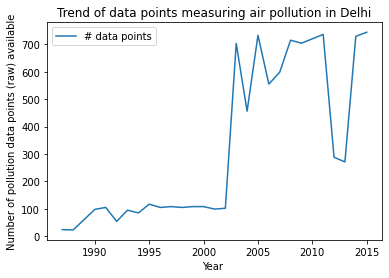

In [21]:
print("Number of raw data points measuring air pollution in Delhi available in the dataset(s)")

# Creating a line plot
xdata = year_list
ydata = no_of_data_pts

plotOptions = {}

plotOptions['title'] = "Trend of data points measuring air pollution in Delhi"
plotOptions['xlabel'] = "Year "
plotOptions['ylabel'] = "Number of pollution data points (raw) available"
plotOptions['save_fig'] = "number_of_data_points_yearly_trend.png"
plotOptions['plot_label'] = "# data points"

create_line_plot(xdata,ydata,plotOptions)




'''
    Analysing pollutant level variation, over the given year
'''


Time Series analysis of concentration of PM 2.5 in Delhi over the year 2015


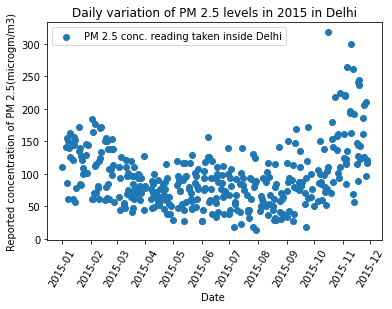

In [23]:
# Creating a scatter plot
year = 2015
pollutant = 'PM 2.5'
# All possible pollutant values for 2014 and 2015 onwards are 'SO2' , 'NO2' , 'PM 2.5' , 'RSPM/PM10'
# All possible pollutant values from 1987 and 2013 onwards are 'SO2' , 'NO2' , 'SPM' , 'RSPM/PM10'

print("Time Series analysis of concentration of "+pollutant+" in Delhi over the year "+str(year))

# Creating a scatter plot
focus_data = data[['Sampling Date',pollutant]].dropna()
list_of_date_strs = focus_data['Sampling Date']
list_of_observation_dates = [datetime.strptime(date_str ,"%d-%m-%y").date() for date_str in list_of_date_strs ]
data_for_specific_pollutant = focus_data[pollutant]

xdata = list_of_observation_dates
ydata = data_for_specific_pollutant

plotOptions = {}

plotOptions['title'] = "Daily variation of "+pollutant+" levels in "+str(year)+" in Delhi"
plotOptions['xlabel'] = "Date "
plotOptions['ylabel'] = "Reported concentration of "+pollutant+"(microgm/m3)"
plotOptions['save_fig'] = "time_series_pollutant_"+pollutant+"_yr_"+str(year)+".png"
plotOptions['plot_label'] = pollutant+" conc. reading taken inside Delhi"
plotOptions['xtick_rotation'] = 60

create_scatter_plot(xdata,ydata,plotOptions)

'''
    Analysing pollutant concentration distribution, monitoring station wise : box plot
    Please Note : Station wise analysis available only 2004 onwards
'''

Location wise analysis of concentration of NO2 in Delhi over the year 2015


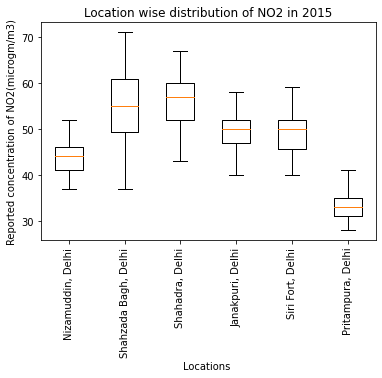

In [24]:
# Creatign a box plot
year = 2015
pollutant = 'NO2'
# All possible pollutant values for 2014 and 2015 onwards are 'SO2' , 'NO2' , 'PM 2.5' , 'RSPM/PM10'
# All possible pollutant values from 1987 and 2013 onwards are 'SO2' , 'NO2' , 'SPM' , 'RSPM/PM10'


print("Location wise analysis of concentration of "+pollutant+" in Delhi over the year "+str(year))



list_of_locations = data['Location of Monitoring Station'].unique()
box_plot_data = []
box_plot_labels_of_ticks = []



for i in range(len(list_of_locations)):
    # Filtering data corresponding to a given station
    station_data = data[data['Location of Monitoring Station'] == list_of_locations[i]].dropna()
    station_data_for_specific_pollutant = station_data[pollutant]
    
    # If there is any valid data point left in station_data
    if len(station_data_for_specific_pollutant)>0:

        box_plot_labels_of_ticks.append(list_of_locations[i])
        box_plot_data.append(station_data_for_specific_pollutant)

ydata = box_plot_data


plotOptions = {}

plotOptions['title'] = "Location wise distribution of "+pollutant+" in "+str(year)
plotOptions['xlabel'] = "Locations "
plotOptions['ylabel'] = "Reported concentration of "+pollutant +"(microgm/m3)"
plotOptions['save_fig'] = "location_wise_pollutant_"+pollutant+"_yr_"+str(year)+".png"
# plotOptions['plot_label'] = pollutant+" conc. reading taken inside Delhi"
plotOptions['xtick_rotation'] = 90
plotOptions['showfliers'] = False
plotOptions['xtick_labels'] = box_plot_labels_of_ticks

create_box_plot(ydata,plotOptions)








'''
    Also data credits : 
    1) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1988, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-1988. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    2) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise monthly Ambient Air Quality of Delhi for the year 2001, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-2001. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    3) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1994, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-1994. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    4) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2000, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-2000. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    5) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1991, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-1991. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    6) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1997, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-1997. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    7) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1999, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-1999. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    8) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2015, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2015. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    9) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1996, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-1996. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    10) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2008, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2008. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    11) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1987, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-1987. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    12) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2012, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2012. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    13) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2003, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2003. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    14) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2005, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2005. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    15) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2013, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2013. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    16) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2004, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2004. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    17) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2006, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2006. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    18) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2014, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2014. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    19) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1990, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-1990. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    20) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1993, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-1993. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    21) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1998, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-1998. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    22) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1992, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-1992. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    23) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 1995, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-1995. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    24) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2002, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-monthly-ambient-air-quality-delhi-year-2002. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    25) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2007, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2007. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    26) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2011, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2011. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    27) Central Pollution Control Board & Ministry of Environment and Forests, 2017, Location wise daily Ambient Air Quality of Delhi for the year 2009, Open Government Data Platform India, 24/04/2017, https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2009. Published under Government Open Data Licence - India: https://data.gov.in/government-open-data-license-india
    
    
'''